<a href="https://colab.research.google.com/github/williamG7/Horas-de-estudio/blob/main/Horas_de_estudio_GuzmanWilliam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horas de estudio polinómicas

## Descripción del escenario de estudio

### Generación del Dataset: Impacto del Estudio en el Rendimiento Académico

Para este análisis, desarrollaremos un conjunto de datos sintético que simula la relación entre la **nota de un examen** y las **horas de estudio** invertidas por el alumnado.

El dataset se compone de dos dimensiones principales:
1. **Horas de estudio**: Representadas como valores enteros.
2. **Nota del examen**: Valores en una escala del 0 al 10, con precisión de dos decimales.

Este conjunto de datos tendrá un volumen masivo de muestras, situado entre **75.000 y 100.000 registros**, lo que permitirá un entrenamiento robusto del modelo.

**Muestra de la estructura de datos:**

| hores_estudi | nota_final |
| :--- | :--- |
| 0 | 0.85 |
| 2 | 4.25 |
| 3 | 5.35 |
| 13 | 9.86 |

## Creación de datos

### Definimos el numero de muestras

In [39]:
import numpy as np
import random

num_total_mostres = random.randint(75000, 100000)
print('Num alumnos:',num_total_mostres)

grup_estudi_1 = int(num_total_mostres * 0.50)
grup_estudi_2 = int(num_total_mostres * 0.35)
grup_estudi_3 = int(num_total_mostres * 0.15)

num_total_mostres = grup_estudi_1 + grup_estudi_2 + grup_estudi_3
print('Numero de alumnos final:',num_total_mostres)

Num alumnos: 93384
Numero de alumnos final: 93383


### Variable independiente: horas estudio

Generamos los datos de la variable independiente **horas_estudio**

In [60]:
bloc_hores_1 = 0
bloc_hores_2 = random.randint(1, 4)
bloc_hores_3 = random.randint(bloc_hores_2, random.randint(5, 7))
bloc_hores_4 = random.randint(bloc_hores_3, random.randint(10, 20))

print(bloc_hores_2, bloc_hores_3, bloc_hores_4)

hores_estudi_grup1 = list(random.choices(range(bloc_hores_1, bloc_hores_2, 1), k = grup_estudi_1))
hores_estudi_grup2 = list(random.choices(range(bloc_hores_2, bloc_hores_3, 1), k = grup_estudi_2))
hores_estudi_grup3 = list(random.choices(range(bloc_hores_3, bloc_hores_4, 1), k = grup_estudi_3))

hores_estudi = hores_estudi_grup1 + hores_estudi_grup2 + hores_estudi_grup3

print(len(hores_estudi))
hores_estudi.sort()
print(hores_estudi[:100])

## AVISO: Debido al random, cuando el total de num_total_mostres y el sumatorio de los valores del grupo de estudio no cuadran, puede dar errores.
## Solución: Volver a ejecutar el bloque de código anterior y luego todo lo demás.

4 5 12
93383
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Visualizamos los datos de la variable independiente **horas_estudio**

Text(0, 0.5, 'recuento alumnos')

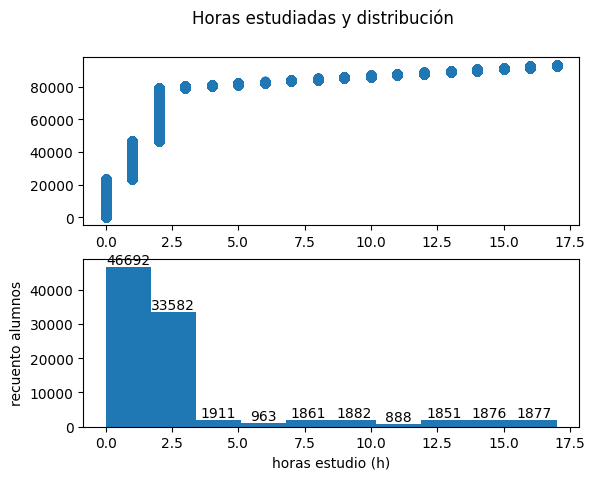

In [41]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)
fig.suptitle('Horas estudiadas y distribución')

# Gràfica superior de puntos
ax[0].scatter(hores_estudi,
              list(range(0, num_total_mostres, 1)))

# Gràfica inferior de histograma
count, edges, bars = ax[1].hist(hores_estudi, 10)
ax[1].bar_label(bars)
plt.xlabel('horas estudio (h)')
plt.ylabel('recuento alumnos')

### Variable dependiente nota final

Generamos los datos de la variable independiente **nota_final**

In [42]:
import pandas as pd

notes_1 = round(random.uniform(0.75, 2.0),2)
notes_2 = round(random.uniform(notes_1, 6.0),2)
notes_3 = round(random.uniform(notes_2, 8.5),2)

std_dev = 1.0

grup_notes_1 = list(np.random.normal(notes_1, std_dev, grup_estudi_1))
grup_notes_2 = list(np.random.normal(notes_2, std_dev, grup_estudi_2))
grup_notes_3 = list(np.random.normal(notes_3, std_dev, grup_estudi_3))

llista_notes = grup_notes_1 + grup_notes_2 + grup_notes_3

for i in range(0, len(llista_notes), 1):
    if llista_notes[i] < 0:
      llista_notes[i] = random.random()
    elif llista_notes[i] >= 9.0:
      llista_notes[i] = 9.0 + random.random()

llista_notes_df = pd.DataFrame(
                              {'nota_final' : llista_notes}
                              )

print(llista_notes_df)
print(llista_notes_df.mean(),llista_notes_df.min(), llista_notes_df.max())

       nota_final
0        0.395129
1        0.114540
2        3.343150
3        2.246791
4        1.513331
...           ...
93378    8.365221
93379    6.127848
93380    9.646355
93381    9.315799
93382    7.663420

[93383 rows x 1 columns]
nota_final    2.931257
dtype: float64 nota_final    0.000009
dtype: float64 nota_final    9.999533
dtype: float64


Graficar los datos de las notas

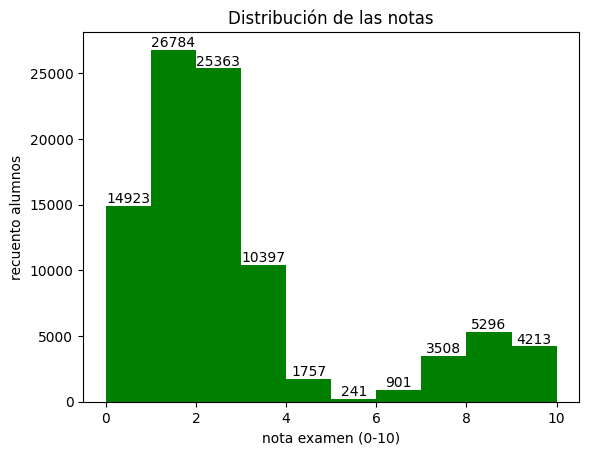

In [43]:
a, b, c = plt.hist(llista_notes_df, color = 'green')
plt.bar_label(c)
plt.title('Distribución de las notas')
plt.xlabel('nota examen (0-10)')
plt.ylabel('recuento alumnos')

plt.show()

### Generamos dataset final

Creación de un pandas.DataFrame con las dos columnas:
1. Variable independiente: **hores_estudi**
2. Variable dependiente: **nota_final**

In [44]:
print(type(hores_estudi))
print(type(llista_notes_df))

dataset = pd.DataFrame(
                      {
                       'hores_estudi' : hores_estudi
                       ,'nota_final' : llista_notes_df['nota_final']
                      }
                      )


print(dataset)

<class 'list'>
<class 'pandas.core.frame.DataFrame'>
       hores_estudi  nota_final
0                 0    0.395129
1                 0    0.114540
2                 0    3.343150
3                 0    2.246791
4                 0    1.513331
...             ...         ...
93378            17    8.365221
93379            17    6.127848
93380            17    9.646355
93381            17    9.315799
93382            17    7.663420

[93383 rows x 2 columns]


Graficamos los datos del dataset final

Text(0, 0.5, 'nota examen (0-10)')

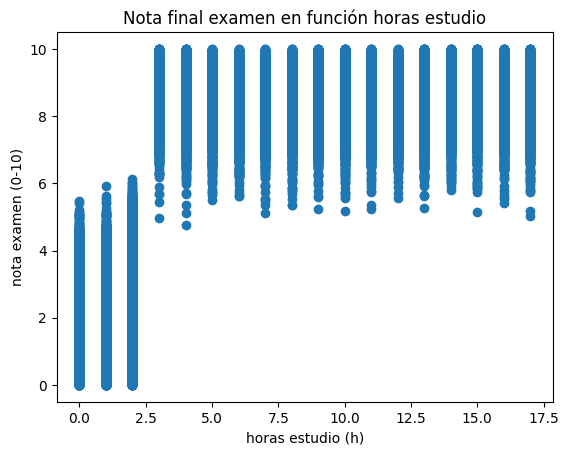

In [45]:
plt.scatter(dataset['hores_estudi']
            ,dataset['nota_final'])

plt.title('Nota final examen en función horas estudio')
plt.xlabel('horas estudio (h)')
plt.ylabel('nota examen (0-10)')

---

## tareas a realizar:

## Metodología de Análisis: Impacto del Estudio en el Rendimiento Académico

En esta sección del proyecto, desarrollaremos una serie de **modelos predictivos** (desde regresión lineal simple hasta regresiones polinómicas de grado superior). El objetivo es determinar con qué precisión podemos estimar la **nota final** ($y$) basándonos únicamente en las **horas de estudio** ($x$) invertidas por el estudiante.

### 1. Modelado mediante Regresión Lineal Simple
Iniciamos el análisis implementando un modelo base para identificar la tendencia lineal entre las horas y las calificaciones.
* **Entrenamiento**: Ajustaremos el modelo utilizando `LinearRegression().fit()`.
* **Evaluación de Bondad de Ajuste**: Analizaremos el *score* para entender qué porcentaje de la varianza explica nuestro modelo inicial.
* **Interpretación Matemática**: Extraeremos la ecuación de la recta para comprender el incremento marginal de la nota por cada hora extra de estudio.
* **Visualización de Resultados**: Generaremos una comparativa gráfica entre los datos reales (`plt.scatter`) y la línea de tendencia calculada (`plt.plot`).

### 2. Optimización mediante Regresiones Polinómicas
Dado que el comportamiento académico no siempre es lineal, exploraremos modelos de mayor complejidad técnica:
* **Ajuste de Grados (1-6)**: Experimentaremos con diferentes grados de libertad para encontrar la curva que mejor se adapte a la distribución real de los datos.
* **Análisis de Coeficiente R²**: Evaluaremos el coeficiente de determinación para cada grado con el fin de detectar el punto óptimo y evitar el sobreajuste (overfitting).
* **Validación Visual**: Representaremos las diferentes curvas sobre el dataset para observar gráficamente la mejora en el ajuste.


---

### 3. Validación Cruzada y Evaluación de Precisión (Fase Extra)

Para garantizar la robustez del modelo y su capacidad de generalización ante nuevos perfiles de estudiantes, aplicaremos una estrategia de **división de datos**:

* **Segmentación Train/Test**: Dividiremos el dataset original reservando un **80% para entrenamiento** y un **20% para evaluación independiente**.

# Regresión Linial

### Generar modelo de regresión lineal:

In [46]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

variable_independent = dataset[['hores_estudi']]
variable_dependent = dataset['nota_final']

### Entrenar el modelo lineal a partir de las horas estudiadas vs la nota final

In [47]:
# creo modelo de regresion lineal y los entreno con mis datos
regresion_lineal = LinearRegression()
regresion_lineal.fit(variable_independent,variable_dependent)

LinearRegression()

### Probamos valores individuales de horas de estudio:

In [48]:
# predecimos la nota de un estudiante que ha estudiado 15 horas
horas = 15
nota_predicha = regresion_lineal.predict([[horas]])
print(f"Si estudias {horas} horas, tu nota estimada es: {nota_predicha[0]:.2f}")

Si estudias 15 horas, tu nota estimada es: 9.96


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Creamos una nueva columna en el dataset añadiendo la nota pronosticada por el modelo:

In [49]:
# predecir para todas las horas
predicciones = regresion_lineal.predict(variable_independent)
# crea la columna con las predicciones
dataset['nota_predicha_lineal'] = predicciones
print(dataset.head)

<bound method NDFrame.head of        hores_estudi  nota_final  nota_predicha_lineal
0                 0    0.395129              1.560578
1                 0    0.114540              1.560578
2                 0    3.343150              1.560578
3                 0    2.246791              1.560578
4                 0    1.513331              1.560578
...             ...         ...                   ...
93378            17    8.365221             11.075170
93379            17    6.127848             11.075170
93380            17    9.646355             11.075170
93381            17    9.315799             11.075170
93382            17    7.663420             11.075170

[93383 rows x 3 columns]>


### Graficamos las notas de examen por horas de estudio con la recta de la regresión encima:

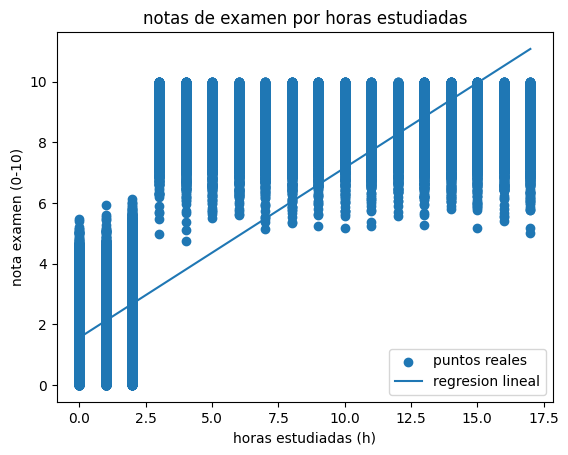

In [50]:
# graficar puntos reales
plt.scatter(dataset['hores_estudi'], dataset['nota_final'], label= 'puntos reales')

# graficar linea de regresion
plt.plot(dataset['hores_estudi'], dataset['nota_predicha_lineal'], label = 'regresion lineal')

plt.title('notas de examen por horas estudiadas')
plt.xlabel('horas estudiadas (h)')
plt.ylabel('nota examen (0-10)')
plt.legend()
plt.show()

### Hacemos una prueba de puntuación.

In [51]:
regresion_lineal.score(variable_independent,variable_dependent)

0.6667547357149819

## Regresión Polinómica

### Crear regresión polinómica

In [52]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures

# Crear transformador polinómico (grado 2)
poly_features = PolynomialFeatures(degree=2)

# Transformar las horas de estudio
variable_independent_poly = poly_features.fit_transform(variable_independent)

# Crear y entrenar modelo
regresion_polinomica = LinearRegression()
regresion_polinomica.fit(variable_independent_poly, variable_dependent)

LinearRegression()

### Graficar resultados con regresión polinómica encima:

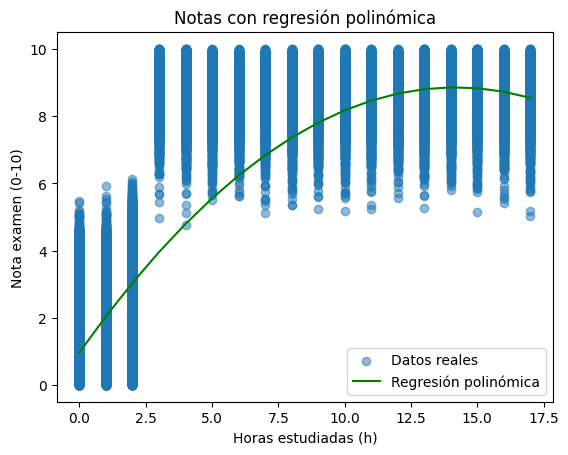

In [53]:
# Hacer predicciones polinómicas
predicciones_poly = regresion_polinomica.predict(variable_independent_poly)

# Añadir al dataset
dataset['nota_predicha_poly'] = predicciones_poly

# Graficar puntos reales
plt.scatter(dataset['hores_estudi'], dataset['nota_final'], label='Datos reales', alpha=0.5)

# Graficar curva polinómica
plt.plot(dataset['hores_estudi'], dataset['nota_predicha_poly'], color='green', label='Regresión polinómica')

plt.title('Notas con regresión polinómica')
plt.xlabel('Horas estudiadas (h)')
plt.ylabel('Nota examen (0-10)')
plt.legend()
plt.show()

### Provamos un valor individual

In [54]:
horas_test = 10

# Transformar el valor a formato polinómico
horas_poly = poly_features.transform([[horas_test]])

# Predecir
nota_predicha_poly = regresion_polinomica.predict(horas_poly)

print(f"Si estudias {horas_test} horas, tu nota estimada es: {nota_predicha_poly[0]:.2f}")

Si estudias 10 horas, tu nota estimada es: 8.17


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


### Comprobamos r-squared de la regresión polinómica encontrada:

In [55]:
regresion_polinomica.score(variable_independent_poly, variable_dependent)

0.7239276240245158

---

## Extra:

### Función para hacer split del dataframe en dos trozos:

In [56]:
from sklearn.model_selection import train_test_split

# Dividir datos en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    variable_independent,
    variable_dependent,
    test_size=0.2,  # 20% para test
    random_state=42  # Para reproducibilidad
)

print(f"Datos totales: {len(variable_independent)}")
print(f"Datos de entrenamiento: {len(X_train)}")
print(f"Datos de prueba: {len(X_test)}")
print(f"\nPorcentaje train: {len(X_train)/len(variable_independent)*100:.1f}%")
print(f"Porcentaje test: {len(X_test)/len(variable_independent)*100:.1f}%")

Datos totales: 93383
Datos de entrenamiento: 74706
Datos de prueba: 18677

Porcentaje train: 80.0%
Porcentaje test: 20.0%


### Crear regresión polinómica y encontrar el grado adecuado:

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Probar diferentes grados
grados = [1, 2, 3, 4, 5]
scores_train = []
scores_test = []

for grado in grados:
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=grado)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Crear y entrenar modelo
    modelo = LinearRegression()
    modelo.fit(X_train_poly, y_train)

    # Calcular scores
    score_train = modelo.score(X_train_poly, y_train)
    score_test = modelo.score(X_test_poly, y_test)

    scores_train.append(score_train)
    scores_test.append(score_test)

    print(f"Grado {grado}: R² Train = {score_train:.4f}, R² Test = {score_test:.4f}")

# Encontrar el mejor grado
mejor_grado = grados[scores_test.index(max(scores_test))]
print(f"\n Mejor grado: {mejor_grado} (R² Test = {max(scores_test):.4f})")

Grado 1: R² Train = 0.6680, R² Test = 0.6615
Grado 2: R² Train = 0.7250, R² Test = 0.7193
Grado 3: R² Train = 0.7408, R² Test = 0.7363
Grado 4: R² Train = 0.7878, R² Test = 0.7840
Grado 5: R² Train = 0.8148, R² Test = 0.8098

 Mejor grado: 5 (R² Test = 0.8098)


### Calcular r-cuadrado:

In [58]:
# Crear modelo con el mejor grado
poly_final = PolynomialFeatures(degree=mejor_grado)
X_train_final = poly_final.fit_transform(X_train)
X_test_final = poly_final.transform(X_test)

modelo_final = LinearRegression()
modelo_final.fit(X_train_final, y_train)

# Calcular R²
r2_train = modelo_final.score(X_train_final, y_train)
r2_test = modelo_final.score(X_test_final, y_test)

print(f"Modelo final (grado {mejor_grado}):")
print(f"R² Train: {r2_train:.4f}")
print(f"R² Test: {r2_test:.4f}")

Modelo final (grado 5):
R² Train: 0.8148
R² Test: 0.8098


### Calcular acierto:

Métricas del Modelo Final
MAE (Error Absoluto Medio): 0.8435 puntos
MSE (Error Cuadrático Medio): 1.1726
RMSE (Raíz del Error Cuadrático): 1.0829 puntos
Porcentaje de Acierto
Predicciones con error < 0.5 puntos: 36.26%
Predicciones con error < 1.0 punto: 66.12%


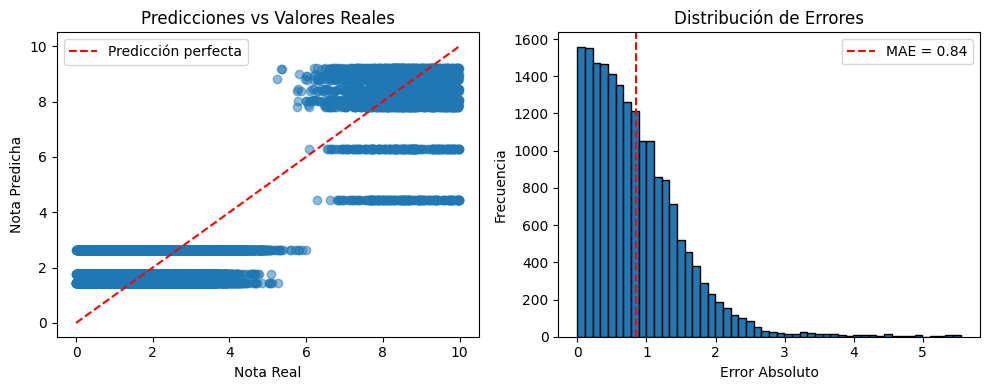

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Hacer predicciones con el modelo final
y_pred_train = modelo_final.predict(X_train_final)
y_pred_test = modelo_final.predict(X_test_final)

# Calcular métricas para el conjunto de TEST
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("Métricas del Modelo Final")
print(f"MAE (Error Absoluto Medio): {mae:.4f} puntos")
print(f"MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"RMSE (Raíz del Error Cuadrático): {rmse:.4f} puntos")

# Calcular porcentaje de predicciones con error < 0.5 puntos
errores = np.abs(y_test - y_pred_test)
aciertos_05 = np.sum(errores < 0.5) / len(y_test) * 100
aciertos_10 = np.sum(errores < 1.0) / len(y_test) * 100

print(f"Porcentaje de Acierto")
print(f"Predicciones con error < 0.5 puntos: {aciertos_05:.2f}%")
print(f"Predicciones con error < 1.0 punto: {aciertos_10:.2f}%")

# Visualización de errores
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([0, 10], [0, 10], 'r--', label='Predicción perfecta')
plt.xlabel('Nota Real')
plt.ylabel('Nota Predicha')
plt.title('Predicciones vs Valores Reales')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(errores, bins=50, edgecolor='black')
plt.xlabel('Error Absoluto')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.axvline(mae, color='r', linestyle='--', label=f'MAE = {mae:.2f}')
plt.legend()

plt.tight_layout()
plt.show()